# requierments

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import pickle
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from torch import nn, cuda
import torch
from transformers import AdamW
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import Trainer
from transformers import TrainingArguments
from transformers import DataCollatorForLanguageModeling
from transformers import RobertaForMaskedLM
from transformers import RobertaTokenizer
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaModel
from torch.utils.data import DataLoader, Dataset



In [ ]:
# prompt: coonect to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/behaviors.tsv', sep='\t', names=['index','user_id','timestamp','news_explored','news_suggested_and_action'], header=None) # Use names to specify column names and header=0 to skip the first row as header
df


,index,user_id,timestamp,news_explored,news_suggested_and_action
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [ ]:


# Ensure the output directory exists
output_dir = '/content/drive/MyDrive/users'
os.makedirs(output_dir, exist_ok=True)

# Group data by user_id
user_groups = df.groupby('user_id')

# Iterate over each user group and save their activities
for user_id, group in user_groups:
    # Get the number of unique timestamps for the user
    num_timestamps = group['timestamp'].nunique()
    print(f"User {user_id} has {num_timestamps} unique timestamps.")

    # Save the user's activity as a separate CSV file
    user_file_path = os.path.join(output_dir, f'user_{user_id}.csv')
    group.to_csv(user_file_path, index=False)

print(f"Data for each user has been saved to {output_dir}")


Streaming output truncated to the last 5000 lines.
User U86144 has 3 unique timestamps.
User U86145 has 3 unique timestamps.
User U86148 has 2 unique timestamps.
User U8615 has 1 unique timestamps.
User U86152 has 2 unique timestamps.
User U86153 has 5 unique timestamps.
User U86154 has 1 unique timestamps.
User U86155 has 2 unique timestamps.
User U86157 has 4 unique timestamps.
User U86158 has 6 unique timestamps.
User U86159 has 10 unique timestamps.
User U8616 has 2 unique timestamps.
User U86160 has 6 unique timestamps.
User U86161 has 1 unique timestamps.
User U86162 has 1 unique timestamps.
User U86165 has 1 unique timestamps.
User U86167 has 1 unique timestamps.
User U86168 has 1 unique timestamps.
User U86169 has 6 unique timestamps.
User U86174 has 1 unique timestamps.
User U86175 has 1 unique timestamps.
User U86176 has 1 unique timestamps.
User U86179 has 3 unique timestamps.
User U8618 has 2 unique timestamps.
User U86180 has 1 unique timestamps.
User U86181 has 3 unique t

In [ ]:
# prompt: i want ls for  /content/drive/MyDrive/users

!ls /content/drive/MyDrive/users

Streaming output truncated to the last 5000 lines.
user_U18357.csv  user_U35303.csv  user_U52590.csv  user_U6949.csv   user_U8614.csv
user_U18358.csv  user_U35304.csv  user_U52591.csv  user_U694.csv    user_U86152.csv
user_U18359.csv  user_U3530.csv   user_U52593.csv  user_U69502.csv  user_U86153.csv
user_U18360.csv  user_U35310.csv  user_U52595.csv  user_U69503.csv  user_U86154.csv
user_U18364.csv  user_U35312.csv  user_U52599.csv  user_U69504.csv  user_U86155.csv
user_U18366.csv  user_U35313.csv  user_U525.csv    user_U69505.csv  user_U86157.csv
user_U18370.csv  user_U35314.csv  user_U52600.csv  user_U69506.csv  user_U86158.csv
user_U18371.csv  user_U35315.csv  user_U52601.csv  user_U69507.csv  user_U86159.csv
user_U18372.csv  user_U35316.csv  user_U52602.csv  user_U69508.csv  user_U8615.csv
user_U18373.csv  user_U35317.csv  user_U52603.csv  user_U6950.csv   user_U86160.csv
user_U18375.csv  user_U35318.csv  user_U52605.csv  user_U69510.csv  user_U86161.csv
user_U18376.csv  user_U3531

In [ ]:

# Assuming `df` is your original dataframe
# Sample data in `df` for demonstration
# df = pd.read_csv('your_data.csv')

# Initialize a list to store new records
new_records = []

# Loop over each row in the original dataframe
for _, row in df.iterrows():
    # Extract user_id and news_suggested_and_action for this row
    user_id = row['user_id']
    news_suggested_and_action = row['news_suggested_and_action']

    # Split the news_suggested_and_action by space to get each news label pair (e.g., "N55689-1")
    suggestions = news_suggested_and_action.split()

    # Iterate over each suggestion
    for suggestion in suggestions:
        # Split each suggestion by the '-' to separate news_id and label
        news_id, label = suggestion.split('-')

        # Create a new record with user_id, news_id, and label
        new_records.append([user_id, news_id, int(label)])

# Convert the list of records into a new dataframe
new_df = pd.DataFrame(new_records, columns=['user_id', 'news_id', 'label'])

# Display the new dataframe
(new_df)


        user_id news_id  label
0        U13740  N55689      1
1        U13740  N35729      0
2        U91836  N20678      0
3        U91836  N39317      0
4        U91836  N58114      0
...         ...     ...    ...
5843439  U44625  N39317      0
5843440  U64800  N61233      0
5843441  U64800  N33828      1
5843442  U64800  N19661      0
5843443  U64800  N41934      0

[5843444 rows x 3 columns]


In [ ]:
# prompt: check if in new_df for a value of user-id and news_id is it possible to have both 1 and 0 labels


# ... (Your existing code to create new_df) ...

# Group by user_id and news_id, then check if the label column has both 0 and 1
# Assign a name to the lambda function using `namedAgg`
label_counts = new_df.groupby(['user_id', 'news_id'])['label'].agg(
    nunique='nunique', unique_labels=lambda x: set(x.unique())
)

# Iterate through the label_counts DataFrame
for index, row in label_counts.iterrows():
    if row['nunique'] == 2 and row['unique_labels'] == {0, 1}:
        print("Found a conflict for user_id:", index[0], "and news_id:", index[1])
        print(row)  # Print the row containing the conflict
        break  # Exit the loop after finding the first conflict
else:
    print("No user-id and news_id pairs have both 0 and 1 labels.")

Found a conflict for user_id: U1000 and news_id: N53875
nunique               2
unique_labels    {0, 1}
Name: (U1000, N53875), dtype: object


In [ ]:
# prompt: chack for unique values of each column in df and nan values and duplicates

# Check for unique values, NaN values, and duplicates in each column
for col in df.columns:
    print(f"Column {col}:")
    print(f"  Unique values: {df[col].unique()}")
    print(f"  Number of unique values: {df[col].nunique()}")
    print(f"  Number of NaN values: {df[col].isna().sum()}")
    print(f"  Number of duplicate values: {df[col].duplicated().sum()}")
    print("-" * 20)

Column index:
  Unique values: [     2      3      4 ... 156963 156964 156965]
  Number of unique values: 156964
  Number of NaN values: 0
  Number of duplicate values: 0
--------------------
Column user_id:
  Unique values: ['U91836' 'U73700' 'U34670' ... 'U43157' 'U66493' 'U72015']
  Number of unique values: 50000
  Number of NaN values: 0
  Number of duplicate values: 106964
--------------------
Column timestamp :
  Unique values: ['11/12/2019 6:11:30 PM' '11/14/2019 7:01:48 AM' '11/11/2019 5:28:05 AM'
 ... '11/14/2019 4:20:44 PM' '11/14/2019 10:24:05 PM'
 '11/14/2019 3:25:49 PM']
  Number of unique values: 125501
  Number of NaN values: 0
  Number of duplicate values: 31463
--------------------
Column news_explored:
  Unique values: ['N31739 N6072 N63045 N23979 N35656 N43353 N8129 N1569 N17686 N13008 N21623 N6233 N14340 N48031 N62285 N44383 N23061 N16290 N6244 N45099 N58715 N59049 N7023 N50528 N42704 N46082 N8275 N15710 N59026 N8429 N30867 N56514 N19709 N31402 N31741 N54889 N9798 N

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/news.tsv', sep='\t',names=['news_id','category','subcategory ','title','abstract','adress','title_entities','abstract_entities'], header=None)
news


,news_id,category,subcategory,title,abstract,adress,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


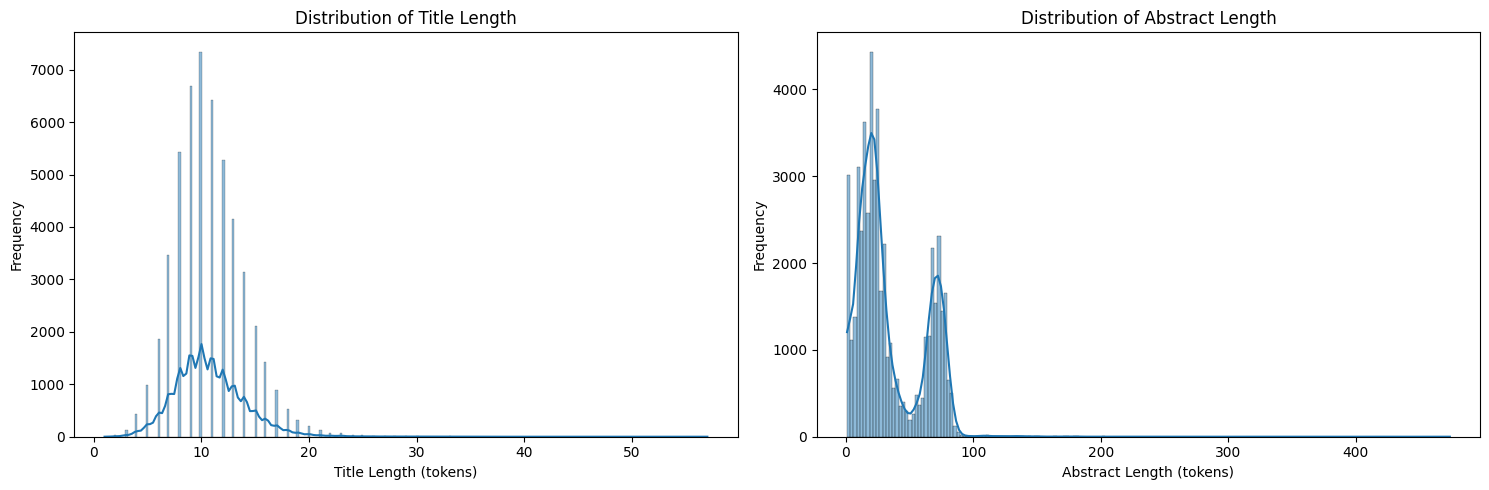

In [ ]:
# prompt: i want eda on length of title and abstraction token size of news, assume each token seperated by space  and then show me its distribution

# Calculate title and abstract token lengths
news['title_length'] = news['title'].astype(str).apply(lambda x: len(x.split()))
news['abstract_length'] = news['abstract'].astype(str).apply(lambda x: len(x.split()))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot title length distribution
sns.histplot(news['title_length'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Title Length')
axes[0].set_xlabel('Title Length (tokens)')
axes[0].set_ylabel('Frequency')

# Plot abstract length distribution
sns.histplot(news['abstract_length'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Abstract Length')
axes[1].set_xlabel('Abstract Length (tokens)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Check for unique values, NaN values, and duplicates in each column
for col in news.columns:
    print(f"Column {col}:")
    # Use news[col] instead of df[col] to access the correct DataFrame
    print(f"  Unique values: {news[col].unique()}")
    print(f"  Number of unique values: {news[col].nunique()}")
    print(f"  Number of NaN values: {news[col].isna().sum()}")
    print(f"  Number of duplicate values: {news[col].duplicated().sum()}")
    print("-" * 20)

Column 0:
  Unique values: ['N55528' 'N19639' 'N61837' ... 'N7482' 'N34418' 'N44276']
  Number of unique values: 51282
  Number of NaN values: 0
  Number of duplicate values: 0
--------------------
Column 1:
  Unique values: ['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'
 'middleeast' 'northamerica']
  Number of unique values: 17
  Number of NaN values: 0
  Number of duplicate values: 51265
--------------------
Column 2:
  Unique values: ['lifestyleroyals' 'weightloss' 'newsworld' 'voices' 'medical'
 'football_nfl' 'weathertopstories' 'gaming' 'newsscienceandtechnology'
 'nutrition' 'autosenthusiasts' 'wellness' 'health-news' 'celebrity'
 'travelarticle' 'autossuvs' 'newspolitics' 'traveltripideas' 'autosnews'
 'newsbusiness' 'golf' 'lifestylepetsanimals' 'recipes' 'tv-gallery'
 'basketball_nba' 'lifestylebuzz' 'shop-all' 'newsphotos'
 'basketball_ncaa' 'finance-real-estate' 'quickandeasy' 

# fine tune roberta

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/news.tsv', sep='\t',names=['news_id','category','subcategory','title','abstract','adress','title_entities','abstract_entities'], header=None)
news


,news_id,category,subcategory,title,abstract,adress,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


## fine tune of masking

In [ ]:
news_title=news['title']
news_title


,title
0,"The Brands Queen Elizabeth, Prince Charles, an..."
1,50 Worst Habits For Belly Fat
2,The Cost of Trump's Aid Freeze in the Trenches...
3,I Was An NBA Wife. Here's How It Affected My M...
4,"How to Get Rid of Skin Tags, According to a De..."
...,...
51277,"Adapting, Learning And Soul Searching: Reflect..."
51278,Family says 13-year-old Broadway star died fro...
51279,St. Dominic soccer player tries to kick cancer...
51280,How the Sounders won MLS Cup


In [ ]:
news_abstract=news['abstract']
news_abstract

,abstract
0,"Shop the notebooks, jackets, and more that the..."
1,These seemingly harmless habits are holding yo...
2,Lt. Ivan Molchanets peeked over a parapet of s...
3,"I felt like I was a fraud, and being an NBA wi..."
4,"They seem harmless, but there's a very good re..."
...,...
51277,Woolsey Fire Anniversary: A community is forev...
51278,NaN
51279,"Sometimes, what happens on the sidelines can b..."
51280,"Mark, Jeremiah and Casey were so excited they ..."


In [ ]:
# Concatenate news titles and abstracts into a single column
dataset = pd.concat([news_title, news_abstract], ignore_index=True)

# Create a new DataFrame with the combined dataset
dataset_df = pd.DataFrame({'dataset': dataset})

# Display the resulting DataFrame
dataset_df

,dataset
0,"The Brands Queen Elizabeth, Prince Charles, an..."
1,50 Worst Habits For Belly Fat
2,The Cost of Trump's Aid Freeze in the Trenches...
3,I Was An NBA Wife. Here's How It Affected My M...
4,"How to Get Rid of Skin Tags, According to a De..."
...,...
102559,Woolsey Fire Anniversary: A community is forev...
102560,NaN
102561,"Sometimes, what happens on the sidelines can b..."
102562,"Mark, Jeremiah and Casey were so excited they ..."


In [ ]:
# prompt: drop  na of dataset_df

dataset_df.dropna(inplace=True)
dataset_df

,dataset
0,"The Brands Queen Elizabeth, Prince Charles, an..."
1,50 Worst Habits For Belly Fat
2,The Cost of Trump's Aid Freeze in the Trenches...
3,I Was An NBA Wife. Here's How It Affected My M...
4,"How to Get Rid of Skin Tags, According to a De..."
...,...
102557,Over 400 percent more phones shipped year-on-year
102558,When the U.S. women's national soccer team arr...
102559,Woolsey Fire Anniversary: A community is forev...
102561,"Sometimes, what happens on the sidelines can b..."


In [ ]:
# # prompt: i want a dataset with newstitle and news_abstract all records in same dataframe in a single column named dataset

# # Concatenate the 'title' and 'abstract' columns into a single 'dataset' column
# news['dataset'] = news['title'] + ' ' + news['abstract']

# # Display the resulting DataFrame
# print(news[['dataset']])

In [ ]:

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['dataset'], truncation=True, padding='max_length', max_length=128)

# Convert pandas DataFrame to HuggingFace Dataset
dataset = Dataset.from_pandas(dataset_df[['dataset']])
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/99898 [00:00<?, ? examples/s]

Dataset({
    features: ['dataset', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 99898
})

In [ ]:

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15  # Mask 15% of the tokens
)


In [ ]:

model = RobertaForMaskedLM.from_pretrained('roberta-base')


In [ ]:

# Determine the number of CPU cores available

cpu_cores = os.cpu_count()

# Set the number of worker processes for the DataLoader
dataloader_num_workers = min(cpu_cores, 8)  # Use a maximum of 8 workers

print(f"Number of CPU cores detected: {cpu_cores}")
print(f"Using {dataloader_num_workers} worker processes for the DataLoader.")

Number of CPU cores detected: 2
Using 2 worker processes for the DataLoader.


In [ ]:

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/roberta-base-finetuned",  # Directory to save the model
    overwrite_output_dir=True,  # Allow overwriting the output directory
    num_train_epochs=1,  # Number of epochs to train the model (adjust based on dataset size)
    per_device_train_batch_size=64,  # Batch size per device (GPU/CPU)
    save_steps=5000,  # Save model checkpoints every 5000 steps
    learning_rate=5e-5,  # Learning rate for fine-tuning
    weight_decay=0.01,  # Weight decay for regularization
    logging_dir="/content/drive/MyDrive/logs",  # Directory to save logs
    report_to="none",  # Disable all integrations (e.g., wandb, tensorboard)
    dataloader_num_workers=dataloader_num_workers,  # Number of workers for loading data (adjust based on your machine)
)


In [ ]:

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

trainer.train()


Step,Training Loss
500,1.733800
1000,1.676500
1500,1.623100


TrainOutput(global_step=1561, training_loss=1.6736894225096717, metrics={'train_runtime': 2834.7227, 'train_samples_per_second': 35.241, 'train_steps_per_second': 0.551, 'total_flos': 6574923313085952.0, 'train_loss': 1.6736894225096717, 'epoch': 1.0})

In [ ]:
model.save_pretrained("/content/drive/MyDrive/roberta-base-finetuned")
tokenizer.save_pretrained("/content/drive/MyDrive/roberta-base-finetuned")


('/content/drive/MyDrive/roberta-base-finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/roberta-base-finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/roberta-base-finetuned/vocab.json',
 '/content/drive/MyDrive/roberta-base-finetuned/merges.txt',
 '/content/drive/MyDrive/roberta-base-finetuned/added_tokens.json')

## fine tune on classification

In [ ]:
news.head()

,news_id,category,subcategory,title,abstract,adress,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [ ]:
news['input_text'] = news['title'] + " [SEP] " + news['abstract']


In [ ]:

category_encoder = LabelEncoder()
# subcategory_encoder = LabelEncoder()

news['category_label'] = category_encoder.fit_transform(news['category'])
# news['subcategory_label'] = subcategory_encoder.fit_transform(news['subcategory'])


In [ ]:
news.head()

,news_id,category,subcategory,title,abstract,adress,title_entities,abstract_entities,input_text,category_label,subcategory_label
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"The Brands Queen Elizabeth, Prince Charles, an...",6,142
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",50 Worst Habits For Belly Fat [SEP] These seem...,4,259
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",The Cost of Trump's Aid Freeze in the Trenches...,10,191
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ...",I Was An NBA Wife. Here's How It Affected My M...,4,254
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","How to Get Rid of Skin Tags, According to a De...",4,151


In [ ]:

train, test = train_test_split(news, test_size=0.2, random_state=42)
# train, val = train_test_split(train, test_size=0.1, random_state=42)

# Reset the index of the DataFrames
train = train.reset_index(drop=True)  # drop=True to avoid old index being added as a column
test = test.reset_index(drop=True)

In [ ]:

# Calculate the number of unique categories
num_categories = news['category'].nunique()

# Load the saved model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('/content/drive/MyDrive/roberta-base-finetuned')
model = RobertaForSequenceClassification.from_pretrained('/content/drive/MyDrive/roberta-base-finetuned', num_labels=num_categories)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/roberta-base-finetuned and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# from transformers import RobertaTokenizer, RobertaForSequenceClassification
# import pandas as pd

# # Calculate the number of unique categories
# num_categories = news['category'].nunique()

# # Now you can use num_categories to initialize the model
# tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
# model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=num_categories)

In [ ]:

def tokenize_data(texts, labels, tokenizer, max_length=128):
    # Convert the pandas Series to a list of strings
    texts = texts.astype(str).tolist()

    return tokenizer(
        texts,  # Pass the list of strings
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    ), torch.tensor(labels)

In [ ]:
train_tokens, train_labels = tokenize_data(train['input_text'], train['category_label'], tokenizer)
val_tokens, val_labels = tokenize_data(test['input_text'], test['category_label'], tokenizer)


In [ ]:

train_dataset = TensorDataset(train_tokens['input_ids'], train_tokens['attention_mask'], train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(val_tokens['input_ids'], val_tokens['attention_mask'], val_labels)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:

optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:

device = 'cuda' if cuda.is_available() else 'cpu'
model.to(device)
loss_fn = nn.CrossEntropyLoss()
best_val_loss = float('inf')
best_model_state = None
for epoch in tqdm(range(3), desc="Epochs"):  # Use tqdm for progress bar
    model.train()
    for batch_idx, batch in tqdm(enumerate(train_loader), total=len(train_loader), desc="Training", leave=False): # Use tqdm for batch loop progress bar

        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        # Print loss and other metrics every 100 batches
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/3], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Validation loop after each epoch
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct / len(val_dataset)
    print(f'Epoch [{epoch+1}/3], Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}')
    # Save the model weights if the validation loss is the best so far
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()

    scheduler.step()
# Save the best model weights to a file
torch.save(best_model_state, '/content/drive/MyDrive/best_model_weights.pth')

print("Best model weights saved to /content/drive/MyDrive/best_model_weights.pth")

Training:   8%|▊         | 100/1283 [01:02<12:18,  1.60it/s]

Epoch [1/3], Step [100/1283], Loss: 0.7730



Training:  16%|█▌        | 200/1283 [02:04<11:22,  1.59it/s]

Epoch [1/3], Step [200/1283], Loss: 0.7130



Training:  23%|██▎       | 300/1283 [03:06<10:16,  1.60it/s]

Epoch [1/3], Step [300/1283], Loss: 0.7830



Training:  31%|███       | 400/1283 [04:08<09:14,  1.59it/s]

Epoch [1/3], Step [400/1283], Loss: 0.6749



Training:  39%|███▉      | 500/1283 [05:10<08:12,  1.59it/s]

Epoch [1/3], Step [500/1283], Loss: 0.4500



Training:  47%|████▋     | 600/1283 [06:13<07:07,  1.60it/s]

Epoch [1/3], Step [600/1283], Loss: 0.6569



Training:  55%|█████▍    | 700/1283 [07:15<06:05,  1.60it/s]

Epoch [1/3], Step [700/1283], Loss: 0.5612



Training:  62%|██████▏   | 800/1283 [08:17<05:02,  1.60it/s]

Epoch [1/3], Step [800/1283], Loss: 0.6128



Training:  70%|███████   | 900/1283 [09:19<03:59,  1.60it/s]

Epoch [1/3], Step [900/1283], Loss: 0.7666



Training:  78%|███████▊  | 1000/1283 [10:21<02:58,  1.59it/s]

Epoch [1/3], Step [1000/1283], Loss: 0.6496



Training:  86%|████████▌ | 1100/1283 [11:24<01:54,  1.59it/s]

Epoch [1/3], Step [1100/1283], Loss: 0.5476



Training:  94%|█████████▎| 1200/1283 [12:26<00:52,  1.59it/s]

Epoch [1/3], Step [1200/1283], Loss: 0.4026



Epochs:  33%|███▎      | 1/3 [14:18<28:37, 858.62s/it]

Epoch [1/3], Validation Loss: 0.6941, Accuracy: 0.7756



Training:   8%|▊         | 100/1283 [01:02<12:24,  1.59it/s]

Epoch [2/3], Step [100/1283], Loss: 0.7168



Training:  16%|█▌        | 200/1283 [02:04<11:18,  1.60it/s]

Epoch [2/3], Step [200/1283], Loss: 0.7720



Training:  23%|██▎       | 300/1283 [03:06<10:17,  1.59it/s]

Epoch [2/3], Step [300/1283], Loss: 0.6843



Training:  31%|███       | 400/1283 [04:09<09:14,  1.59it/s]

Epoch [2/3], Step [400/1283], Loss: 0.5066



Training:  39%|███▉      | 500/1283 [05:11<08:10,  1.60it/s]

Epoch [2/3], Step [500/1283], Loss: 0.5029



Training:  47%|████▋     | 600/1283 [06:13<07:07,  1.60it/s]

Epoch [2/3], Step [600/1283], Loss: 0.5831



Training:  55%|█████▍    | 700/1283 [07:15<06:05,  1.59it/s]

Epoch [2/3], Step [700/1283], Loss: 0.4265



Training:  62%|██████▏   | 800/1283 [08:17<05:03,  1.59it/s]

Epoch [2/3], Step [800/1283], Loss: 0.5359



Training:  70%|███████   | 900/1283 [09:20<04:01,  1.59it/s]

Epoch [2/3], Step [900/1283], Loss: 0.5719



Training:  78%|███████▊  | 1000/1283 [10:22<02:57,  1.60it/s]

Epoch [2/3], Step [1000/1283], Loss: 0.3761



Training:  86%|████████▌ | 1100/1283 [11:24<01:55,  1.58it/s]

Epoch [2/3], Step [1100/1283], Loss: 0.6380



Training:  94%|█████████▎| 1200/1283 [12:27<00:52,  1.59it/s]

Epoch [2/3], Step [1200/1283], Loss: 0.6342



Epochs:  67%|██████▋   | 2/3 [28:38<14:19, 859.10s/it]

Epoch [2/3], Validation Loss: 0.6370, Accuracy: 0.7997



Training:   8%|▊         | 100/1283 [01:02<12:23,  1.59it/s]

Epoch [3/3], Step [100/1283], Loss: 0.2125



Training:  16%|█▌        | 200/1283 [02:04<11:19,  1.59it/s]

Epoch [3/3], Step [200/1283], Loss: 0.2011



Training:  23%|██▎       | 300/1283 [03:06<10:17,  1.59it/s]

Epoch [3/3], Step [300/1283], Loss: 0.5587



Training:  31%|███       | 400/1283 [04:08<09:13,  1.59it/s]

Epoch [3/3], Step [400/1283], Loss: 0.4478



Training:  39%|███▉      | 500/1283 [05:10<08:10,  1.60it/s]

Epoch [3/3], Step [500/1283], Loss: 0.2950



Training:  47%|████▋     | 600/1283 [06:13<07:10,  1.59it/s]

Epoch [3/3], Step [600/1283], Loss: 0.3744



Training:  55%|█████▍    | 700/1283 [07:15<06:06,  1.59it/s]

Epoch [3/3], Step [700/1283], Loss: 0.4736



Training:  62%|██████▏   | 800/1283 [08:17<05:03,  1.59it/s]

Epoch [3/3], Step [800/1283], Loss: 0.6090



Training:  70%|███████   | 900/1283 [09:19<04:00,  1.59it/s]

Epoch [3/3], Step [900/1283], Loss: 0.6554



Training:  78%|███████▊  | 1000/1283 [10:21<02:57,  1.59it/s]

Epoch [3/3], Step [1000/1283], Loss: 0.8468



Training:  86%|████████▌ | 1100/1283 [11:23<01:54,  1.60it/s]

Epoch [3/3], Step [1100/1283], Loss: 0.2504



Training:  94%|█████████▎| 1200/1283 [12:26<00:52,  1.60it/s]

Epoch [3/3], Step [1200/1283], Loss: 0.3778



Epochs: 100%|██████████| 3/3 [42:56<00:00, 858.73s/it]

Epoch [3/3], Validation Loss: 0.6290, Accuracy: 0.8058


Best model weights saved to /content/drive/MyDrive/best_model_weights.pth


In [ ]:
model.save_pretrained("/content/drive/MyDrive/final-roberta-base-finetuned")
tokenizer.save_pretrained("/content/drive/MyDrive/final-roberta-base-finetuned")


('/content/drive/MyDrive/final-roberta-base-finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/final-roberta-base-finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/final-roberta-base-finetuned/vocab.json',
 '/content/drive/MyDrive/final-roberta-base-finetuned/merges.txt',
 '/content/drive/MyDrive/final-roberta-base-finetuned/added_tokens.json')

# embedding


In [ ]:
news = pd.read_csv('/content/drive/MyDrive/news.tsv', sep='\t',names=['news_id','category','subcategory','title','abstract','adress','title_entities','abstract_entities'], header=None)
news


,news_id,category,subcategory,title,abstract,adress,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


In [ ]:
# prompt: find the max number of subcategory each category can have

# Assuming 'news' DataFrame is already loaded as in your provided code.

# Group by 'category' and count unique 'subcategory' values
subcategory_counts = news.groupby('category')['subcategory'].nunique()

# Find the maximum number of subcategories
max_subcategories = subcategory_counts.max()

print(f"The maximum number of subcategories for any category is: {max_subcategories}")

The maximum number of subcategories for any category is: 47


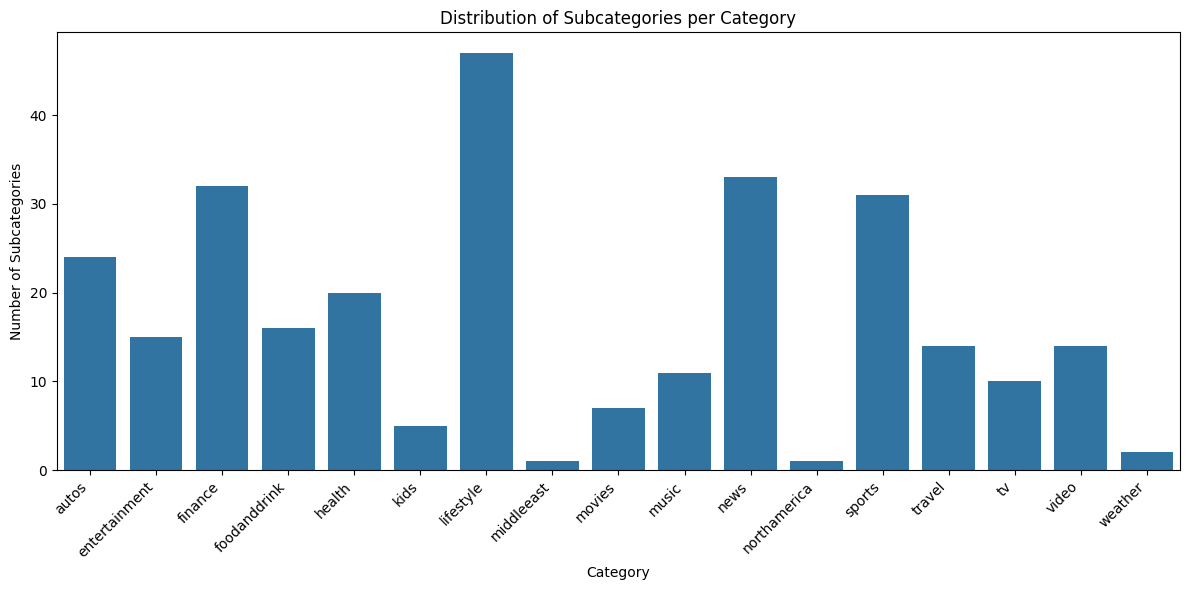

In [ ]:
# prompt: plot distribution of subcategories number for each category


# Assuming 'subcategory_counts' is calculated as in the previous response.
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Subcategories')
plt.title('Distribution of Subcategories per Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# prompt: count number of categories

# Assuming 'news' DataFrame is already loaded as in your provided code.

# Calculate the number of unique categories
num_categories = news['category'].nunique()

print(f"The number of unique categories is: {num_categories}")

The number of unique categories is: 17


In [ ]:
# prompt: count number of all of the subcategories

# Assuming 'news' DataFrame is already loaded as in your provided code.

# Group by 'category' and count unique 'subcategory' values
subcategory_counts = news.groupby('category')['subcategory'].nunique()

# Print the counts for each category
print(subcategory_counts)

# Calculate the total number of subcategories across all categories
total_subcategories = subcategory_counts.sum()

print(f"\nTotal number of subcategories: {total_subcategories}")

category
autos            24
entertainment    15
finance          32
foodanddrink     16
health           20
kids              5
lifestyle        47
middleeast        1
movies            7
music            11
news             33
northamerica      1
sports           31
travel           14
tv               10
video            14
weather           2
Name: subcategory, dtype: int64

Total number of subcategories: 283


**Approach:**

One-Hot Encoding for Categories:

Each category gets its own column.
A row's value in the category's column is 1 if it belongs to that category, otherwise 0.
Featurizing Subcategories:

* Option 1: Individual One-Hot Encoding
Treat each unique subcategory as a separate feature, similar to categories.
 - This works well if there aren’t too many unique subcategories.
* Option 2: Nested Encoding
Encode subcategories as one-hot, but nest them under their corresponding categories.
 - Example: If health has subcategories like weightloss and diet, their one-hot encoding columns could be health_weightloss and health_diet.
* Option 3: Categorical Encoding (Label or Embedding)
Instead of one-hot encoding, assign each subcategory a unique integer ID or use embeddings to represent them.
 - Useful if there are too many subcategories, as it reduces dimensionality.

**Direct One-Hot Encoding**

Pros:
- Simple and interpretable.
- Ideal for algorithms that don't handle categorical variables directly.

Cons:
- Results in 283 columns, increasing dimensionality.
- Computationally expensive for large datasets or memory-constrained environments.

In [ ]:
# Step 1: Extract all unique categories and subcategories
unique_categories = news['category'].unique().tolist()
unique_subcategories = news['subcategory'].unique().tolist()

print("Unique Categories:", unique_categories)
print("Unique Subcategories:", unique_subcategories)

# Step 2: One-hot encode with extracted categories and subcategories
# Ensure fixed columns based on all unique values
category_dummies = pd.get_dummies(news['category'], prefix='category')
category_dummies = category_dummies.reindex(columns=[f'category_{cat}' for cat in unique_categories], fill_value=0)

subcategory_dummies = pd.get_dummies(news['subcategory'], prefix='subcategory')
subcategory_dummies = subcategory_dummies.reindex(columns=[f'subcategory_{sub}' for sub in unique_subcategories], fill_value=0)

# Step 3: Combine everything into the final DataFrame
news_final = pd.concat([news, category_dummies, subcategory_dummies], axis=1)

# Drop original 'category' and 'subcategory' columns
news_final = news_final.drop(['category', 'subcategory'], axis=1)

(news_final)

Unique Categories: ['lifestyle', 'health', 'news', 'sports', 'weather', 'entertainment', 'autos', 'travel', 'foodanddrink', 'tv', 'finance', 'movies', 'video', 'music', 'kids', 'middleeast', 'northamerica']
Unique Subcategories: ['lifestyleroyals', 'weightloss', 'newsworld', 'voices', 'medical', 'football_nfl', 'weathertopstories', 'gaming', 'newsscienceandtechnology', 'nutrition', 'autosenthusiasts', 'wellness', 'health-news', 'celebrity', 'travelarticle', 'autossuvs', 'newspolitics', 'traveltripideas', 'autosnews', 'newsbusiness', 'golf', 'lifestylepetsanimals', 'recipes', 'tv-gallery', 'basketball_nba', 'lifestylebuzz', 'shop-all', 'newsphotos', 'basketball_ncaa', 'finance-real-estate', 'quickandeasy', 'tv-celebrity', 'travelnews', 'movies-gallery', 'tipsandtricks', 'autosbuying', 'more_sports', 'shop-apparel', 'autostrucks', 'lifestyledidyouknow', 'racing', 'newstrends', 'restaurantsandnews', 'lifestylemindandsoul', 'baseball_mlb', 'finance-saving-investing', 'viral', 'finance-taxe

,news_id,title,abstract,adress,title_entities,abstract_entities,category_lifestyle,category_health,category_news,category_sports,...,subcategory_watch,subcategory_tv-golden-globes-video,subcategory_foodanddrink,subcategory_tennis_intl,subcategory_entertainmentmusic,subcategory_northamerica-video,subcategory_autosmidsize,subcategory_entertainmenttv,subcategory_autoslosangeles,subcategory_celebhub
0,N55528,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,N19639,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,N61837,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,N53526,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ...",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,N38324,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,N16909,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51278,N47585,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[],True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51279,N7482,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[],False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
51280,N34418,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[],False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Replace True/False with 1/0 in all columns
news_final = news_final.replace({True: 1, False: 0})

# Drop the specified columns from the news_final DataFrame
news_final = news_final.drop(['adress', 'title_entities', 'abstract_entities'], axis=1)

(news_final)


<ipython-input-18-9bcef61890dc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  news_final = news_final.replace({True: 1, False: 0})


,news_id,title,abstract,category_lifestyle,category_health,category_news,category_sports,category_weather,category_entertainment,category_autos,...,subcategory_watch,subcategory_tv-golden-globes-video,subcategory_foodanddrink,subcategory_tennis_intl,subcategory_entertainmentmusic,subcategory_northamerica-video,subcategory_autosmidsize,subcategory_entertainmenttv,subcategory_autoslosangeles,subcategory_celebhub
0,N55528,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N19639,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,N61837,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N53526,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N38324,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,N16909,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51278,N47585,Family says 13-year-old Broadway star died fro...,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51279,N7482,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51280,N34418,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: ls from /content/drive/MyDrive/final-roberta-base-finetuned

!ls /content/drive/MyDrive/final-roberta-base-finetuned

config.json  model.safetensors	      tokenizer_config.json
merges.txt   special_tokens_map.json  vocab.json


In [ ]:

# Step 1: Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Step 2: Load the pre-trained model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained("/content/drive/MyDrive/final-roberta-base-finetuned")
model = RobertaModel.from_pretrained("/content/drive/MyDrive/final-roberta-base-finetuned").to(device)

# Step 3: Check for NaN values and replace with empty string
news['title'] = news['title'].fillna('')
news['abstract'] = news['abstract'].fillna('')

# Step 4: Define a custom dataset class for batching
class NewsDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        title = self.dataframe.iloc[idx]['title']
        abstract = self.dataframe.iloc[idx]['abstract']

        # Concatenate title and abstract
        combined_text = title + " [SEP] " + abstract

        # Tokenize the combined text
        encoding = self.tokenizer(combined_text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors="pt")

        return encoding

# Step 5: Create DataLoader for batching
batch_size = 32  # Adjust batch size based on your GPU memory
news_dataset = NewsDataset(news, tokenizer)
dataloader = DataLoader(news_dataset, batch_size=batch_size, shuffle=False)

# Step 6: Function to extract CLS embedding for a batch
def get_cls_embeddings_batch(dataloader):
    cls_embeddings = []
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Processing batches", unit="batch"):
            # Move batch to device (GPU or CPU)
            input_ids = batch['input_ids'].squeeze(1).to(device)
            attention_mask = batch['attention_mask'].squeeze(1).to(device)

            # Get the model output
            output = model(input_ids=input_ids, attention_mask=attention_mask)

            # Extract CLS token embeddings (first token in the sequence)
            cls_embedding = output.last_hidden_state[:, 0, :]
            cls_embeddings.append(cls_embedding.cpu().numpy())

    # Concatenate all batch embeddings
    return np.vstack(cls_embeddings)

# Step 7: Extract embeddings
cls_embeddings = get_cls_embeddings_batch(dataloader)

# Step 8: Convert the embeddings to a DataFrame
cls_embeddings_df = pd.DataFrame(cls_embeddings, columns=[f'cls_embedding_{i}' for i in range(768)])

# Step 9: Concatenate embeddings with original DataFrame
news_final = pd.concat([news.drop(['title', 'abstract'], axis=1), cls_embeddings_df], axis=1)

# Step 10: Replace True/False with 1/0 in all columns
news_final = news_final.replace({True: 1, False: 0})

# Step 11: Drop the unwanted columns (address, title_entities, abstract_entities)
news_final = news_final.drop(['adress', 'title_entities', 'abstract_entities'], axis=1)

# Final dataset ready to use
(news_final.head())


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/final-roberta-base-finetuned and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing batches: 100%|██████████| 1603/1603 [23:07<00:00,  1.15batch/s]


,news_id,category,subcategory,cls_embedding_0,cls_embedding_1,cls_embedding_2,cls_embedding_3,cls_embedding_4,cls_embedding_5,cls_embedding_6,...,cls_embedding_758,cls_embedding_759,cls_embedding_760,cls_embedding_761,cls_embedding_762,cls_embedding_763,cls_embedding_764,cls_embedding_765,cls_embedding_766,cls_embedding_767
0,N55528,lifestyle,lifestyleroyals,-0.057256,1.035268,-0.154549,0.315507,-0.487386,0.516281,-0.295414,...,-0.613914,0.267156,1.707142,0.267760,1.328840,0.820118,0.091576,0.965678,-1.164377,-0.084924
1,N19639,health,weightloss,-0.286610,-0.598205,0.398637,0.072731,-1.396300,-0.336872,0.250874,...,0.315395,-0.020289,-0.102312,0.109313,-0.249329,0.114708,-0.187175,-0.667469,0.007054,-0.031157
2,N61837,news,newsworld,-0.470253,0.246512,-0.393666,0.133204,1.651450,0.725991,-0.441464,...,0.427670,-0.219671,1.138983,-0.829258,1.064867,-0.092545,0.558658,-2.231977,0.014762,-0.521846
3,N53526,health,voices,-0.432402,-0.602678,0.448798,-0.267563,-1.349112,-0.316412,0.087825,...,0.330326,-0.110949,-0.036921,0.089737,-0.281628,0.158339,-0.136537,-0.547921,0.150900,0.048039
4,N38324,health,medical,-0.209040,-0.700729,0.742808,0.251968,-1.560079,-0.081633,-0.162493,...,-0.041278,0.180865,0.857959,0.198329,0.119136,0.492908,0.182469,-0.413122,0.537939,-0.189402


In [ ]:
# Step 1: Extract all unique categories and subcategories
unique_categories = news_final['category'].unique().tolist()
unique_subcategories = news_final['subcategory'].unique().tolist()


# Step 2: One-hot encode with extracted categories and subcategories
# Ensure fixed columns based on all unique values
category_dummies = pd.get_dummies(news_final['category'], prefix='category')
category_dummies = category_dummies.reindex(columns=[f'category_{cat}' for cat in unique_categories], fill_value=0)

subcategory_dummies = pd.get_dummies(news_final['subcategory'], prefix='subcategory')
subcategory_dummies = subcategory_dummies.reindex(columns=[f'subcategory_{sub}' for sub in unique_subcategories], fill_value=0)

# Step 3: Combine everything into the final DataFrame
news_final = pd.concat([news_final, category_dummies, subcategory_dummies], axis=1)

# Drop original 'category' and 'subcategory' columns
news_final = news_final.drop(['category', 'subcategory'], axis=1)

# Replace True/False with 1/0 in all columns
news_final = news_final.replace({True: 1, False: 0})

# Drop the specified columns from the news_final DataFrame

(news_final)


Unique Categories: ['lifestyle', 'health', 'news', 'sports', 'weather', 'entertainment', 'autos', 'travel', 'foodanddrink', 'tv', 'finance', 'movies', 'video', 'music', 'kids', 'middleeast', 'northamerica']
Unique Subcategories: ['lifestyleroyals', 'weightloss', 'newsworld', 'voices', 'medical', 'football_nfl', 'weathertopstories', 'gaming', 'newsscienceandtechnology', 'nutrition', 'autosenthusiasts', 'wellness', 'health-news', 'celebrity', 'travelarticle', 'autossuvs', 'newspolitics', 'traveltripideas', 'autosnews', 'newsbusiness', 'golf', 'lifestylepetsanimals', 'recipes', 'tv-gallery', 'basketball_nba', 'lifestylebuzz', 'shop-all', 'newsphotos', 'basketball_ncaa', 'finance-real-estate', 'quickandeasy', 'tv-celebrity', 'travelnews', 'movies-gallery', 'tipsandtricks', 'autosbuying', 'more_sports', 'shop-apparel', 'autostrucks', 'lifestyledidyouknow', 'racing', 'newstrends', 'restaurantsandnews', 'lifestylemindandsoul', 'baseball_mlb', 'finance-saving-investing', 'viral', 'finance-taxe

<ipython-input-26-6e7eb960f53b>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  news_final = news_final.replace({True: 1, False: 0})


,news_id,cls_embedding_0,cls_embedding_1,cls_embedding_2,cls_embedding_3,cls_embedding_4,cls_embedding_5,cls_embedding_6,cls_embedding_7,cls_embedding_8,...,subcategory_watch,subcategory_tv-golden-globes-video,subcategory_foodanddrink,subcategory_tennis_intl,subcategory_entertainmentmusic,subcategory_northamerica-video,subcategory_autosmidsize,subcategory_entertainmenttv,subcategory_autoslosangeles,subcategory_celebhub
0,N55528,-0.057256,1.035268,-0.154549,0.315507,-0.487386,0.516281,-0.295414,0.265082,0.398588,...,0,0,0,0,0,0,0,0,0,0
1,N19639,-0.286610,-0.598205,0.398637,0.072731,-1.396300,-0.336872,0.250874,-0.159316,0.637348,...,0,0,0,0,0,0,0,0,0,0
2,N61837,-0.470253,0.246512,-0.393666,0.133204,1.651450,0.725991,-0.441464,-0.573336,-0.854405,...,0,0,0,0,0,0,0,0,0,0
3,N53526,-0.432402,-0.602678,0.448798,-0.267563,-1.349112,-0.316412,0.087825,-0.259564,0.715904,...,0,0,0,0,0,0,0,0,0,0
4,N38324,-0.209040,-0.700729,0.742808,0.251968,-1.560079,-0.081633,-0.162493,-0.180387,0.531651,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,N16909,0.160948,0.294736,-0.669765,-1.203697,2.355347,1.154442,-0.106995,-0.586954,-1.365505,...,0,0,0,0,0,0,0,0,0,0
51278,N47585,-0.080903,-0.617297,-0.351530,-0.301076,-0.173774,1.179475,-0.461108,0.837813,1.188569,...,0,0,0,0,0,0,0,0,0,0
51279,N7482,0.462287,0.347128,-0.104754,-0.917948,0.121935,0.300484,0.507037,-0.103575,0.232066,...,0,0,0,0,0,0,0,0,0,0
51280,N34418,0.311853,0.047696,-0.050584,-0.352390,-0.232747,-0.704294,0.275416,-0.471089,1.618992,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# one_hot_columns = [col for col in news_final.columns if col.startswith("category_") or col.startswith("subcategory_")]
# news_final[one_hot_columns] = scaler.fit_transform(news_final[one_hot_columns])


In [ ]:
news_final.to_csv('/content/drive/MyDrive/news_final.csv', index=False)

In [ ]:
news_final

,news_id,cls_embedding_0,cls_embedding_1,cls_embedding_2,cls_embedding_3,cls_embedding_4,cls_embedding_5,cls_embedding_6,cls_embedding_7,cls_embedding_8,...,subcategory_watch,subcategory_tv-golden-globes-video,subcategory_foodanddrink,subcategory_tennis_intl,subcategory_entertainmentmusic,subcategory_northamerica-video,subcategory_autosmidsize,subcategory_entertainmenttv,subcategory_autoslosangeles,subcategory_celebhub
0,N55528,-0.057256,1.035268,-0.154549,0.315507,-0.487386,0.516281,-0.295414,0.265082,0.398588,...,0,0,0,0,0,0,0,0,0,0
1,N19639,-0.286610,-0.598205,0.398637,0.072731,-1.396300,-0.336872,0.250874,-0.159316,0.637348,...,0,0,0,0,0,0,0,0,0,0
2,N61837,-0.470253,0.246512,-0.393666,0.133204,1.651450,0.725991,-0.441464,-0.573336,-0.854405,...,0,0,0,0,0,0,0,0,0,0
3,N53526,-0.432402,-0.602678,0.448798,-0.267563,-1.349112,-0.316412,0.087825,-0.259564,0.715904,...,0,0,0,0,0,0,0,0,0,0
4,N38324,-0.209040,-0.700729,0.742808,0.251968,-1.560079,-0.081633,-0.162493,-0.180387,0.531651,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,N16909,0.160948,0.294736,-0.669765,-1.203697,2.355347,1.154442,-0.106995,-0.586954,-1.365505,...,0,0,0,0,0,0,0,0,0,0
51278,N47585,-0.080903,-0.617297,-0.351530,-0.301076,-0.173774,1.179475,-0.461108,0.837813,1.188569,...,0,0,0,0,0,0,0,0,0,0
51279,N7482,0.462287,0.347128,-0.104754,-0.917948,0.121935,0.300484,0.507037,-0.103575,0.232066,...,0,0,0,0,0,0,0,0,0,0
51280,N34418,0.311853,0.047696,-0.050584,-0.352390,-0.232747,-0.704294,0.275416,-0.471089,1.618992,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: make a dictionay as first column (news-id as key) and others as values. in fact i want to store embeding of each news from news_final


# Create the dictionary
news_dict = {}
for index, row in news_final.iterrows():
    news_id = row['news_id']
    # Exclude 'news_id' from values
    values = row.drop('news_id').to_dict()
    news_dict[news_id] = values

# Example access
#print(news_dict[1])

In [ ]:
# prompt: save news_dict

# Save the dictionary to a file
with open('/content/drive/MyDrive/news_dict.pkl', 'wb') as f:
    pickle.dump(news_dict, f)

# working on behaviours

## time decay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/behaviors.tsv', sep='\t', names=['index','user_id','timestamp','news_explored','news_suggested_and_action'], header=None) # Use names to specify column names and header=0 to skip the first row as header
df


,index,user_id,timestamp,news_explored,news_suggested_and_action
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [ ]:
df.isna().sum()

,0
index,0
user_id,0
timestamp,0
news_explored,3238
news_suggested_and_action,0


In [ ]:
# Parse the timestamp column to datetime format with error handling
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for rows with invalid timestamps
# if df['timestamp'].isnull().any():
#     print("Warning: Some timestamps could not be converted. These rows will be dropped.")
#     df = df.dropna(subset=['timestamp'])
df['news_explored'] = df['news_explored'].replace(np.nan, "")

# # Replace NaN in 'news_explored' with an empty string
# df['news_explored'] = df['news_explored'].fillna("")

# Initialize the history column
df['history'] = None

# Function to compute history
def compute_history(row, df):
    # Get all records for the same user
    user_records = df[df['user_id'] == row['user_id']]

    # Filter records that occurred before the current record's timestamp
    history_records = user_records[user_records['timestamp'] < row['timestamp']]

    # Calculate days before and create the dictionary
    history_list = []
    for _, record in history_records.iterrows():
        days_before = (row['timestamp'] - record['timestamp']).days
        # print(record['news_explored'])
        explored_news = record['news_explored'].split()  # Split news into a list
        history_list.append({days_before: explored_news})

    return history_list

# Apply the function to compute the history column with a progress bar
tqdm.pandas()  # Enable tqdm for pandas
df['history'] = df.progress_apply(lambda row: compute_history(row, df), axis=1)

# Display the result
print(df[['user_id', 'timestamp', 'news_explored', 'history']].head())


100%|██████████| 156965/156965 [41:41<00:00, 62.74it/s]

  user_id           timestamp  \
0  U13740 2019-11-11 09:05:58   
1  U91836 2019-11-12 18:11:30   
2  U73700 2019-11-14 07:01:48   
3  U34670 2019-11-11 05:28:05   
4   U8125 2019-11-12 16:11:21   

                                       news_explored  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                             history  
0  [{2: ['N55189', 'N42782', 'N34694', 'N45794', ...  
1  [{2: ['N31739', 'N6072', 'N63045', 'N23979', '...  
2  [{1: ['N10732', 'N25792', 'N7563', 'N21087', '...  
3                                                 []  
4                                                 []  


In [ ]:
df.isna().sum()

,0
index,0
user_id,0
timestamp,0
news_explored,0
news_suggested_and_action,0
history,0


In [ ]:
df

,index,user_id,timestamp,news_explored,news_suggested_and_action,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ..."
1,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,"[{2: ['N31739', 'N6072', 'N63045', 'N23979', '..."
2,3,U73700,2019-11-14 07:01:48,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,"[{1: ['N10732', 'N25792', 'N7563', 'N21087', '..."
3,4,U34670,2019-11-11 05:28:05,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,[]
4,5,U8125,2019-11-12 16:11:21,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,[]
...,...,...,...,...,...,...
156960,156961,U21593,2019-11-14 22:24:05,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,"[{4: ['N7432', 'N58559', 'N1954', 'N43353', 'N..."
156961,156962,U10123,2019-11-13 06:57:04,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,"[{1: ['N9803', 'N104', 'N24462', 'N57318', 'N5..."
156962,156963,U75630,2019-11-14 10:58:13,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,"[{2: ['N29898', 'N59704', 'N4408', 'N9803', 'N..."
156963,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...,"[{0: ['N4118', 'N47297', 'N3164', 'N43295', 'N..."


In [ ]:
print(df['news_explored'].iloc[0])

N55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801


In [ ]:
print(df['history'].iloc[0])

[{2: ['N55189', 'N42782', 'N34694', 'N45794', 'N18445', 'N63302', 'N10414', 'N19347', 'N31801']}]


In [ ]:
# prompt: i want to see all the records for user U13740


# Assuming 'df' DataFrame is already loaded as in your provided code.
user_id_to_find = 'U13740'
user_records = df[df['user_id'] == user_id_to_find]
user_records

,index,user_id,timestamp,news_explored,news_suggested_and_action,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ..."
35262,35263,U13740,2019-11-09 05:59:43,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N20020-0 N3737-0 N43202-0 N18708-0 N30125-0 N3...,[]
154836,154837,U13740,2019-11-13 15:27:40,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N13907-0 N8509-0 N47061-0 N51048-0 N22417-0 N3...,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ..."


In [ ]:
# Function to extract the min and max days from the history column
def extract_min_max_days(history):
    if not history:  # If history is empty or None
        return np.nan, np.nan
    days = [list(h.keys())[0] for h in history]  # Extract all the keys (days)
    return min(days), max(days)

# Apply the function to extract min and max days
df[['min_days', 'max_days']] = df['history'].apply(
    lambda hist: pd.Series(extract_min_max_days(hist))
)

# Display the result
(df[['history', 'min_days', 'max_days']].head())


,history,min_days,max_days
0,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ...",2.0,2.0
1,"[{2: ['N31739', 'N6072', 'N63045', 'N23979', '...",0.0,3.0
2,"[{1: ['N10732', 'N25792', 'N7563', 'N21087', '...",1.0,1.0
3,[],NaN,NaN
4,[],NaN,NaN


In [ ]:
df[['history', 'min_days', 'max_days']]

,history,min_days,max_days
0,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ...",2.0,2.0
1,"[{2: ['N31739', 'N6072', 'N63045', 'N23979', '...",0.0,3.0
2,"[{1: ['N10732', 'N25792', 'N7563', 'N21087', '...",1.0,1.0
3,[],NaN,NaN
4,[],NaN,NaN
...,...,...,...
156960,"[{4: ['N7432', 'N58559', 'N1954', 'N43353', 'N...",0.0,5.0
156961,"[{1: ['N9803', 'N104', 'N24462', 'N57318', 'N5...",0.0,4.0
156962,"[{2: ['N29898', 'N59704', 'N4408', 'N9803', 'N...",0.0,3.0
156963,"[{0: ['N4118', 'N47297', 'N3164', 'N43295', 'N...",0.0,3.0


In [ ]:
# prompt: fill nans of min_days	max_days by 0

df['min_days'] = df['min_days'].fillna(0)
df['max_days'] = df['max_days'].fillna(0)

In [ ]:
# Parse the timestamp column to datetime format with error handling
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for rows with invalid timestamps
# if df['timestamp'].isnull().any():
#     print("Warning: Some timestamps could not be converted. These rows will be dropped.")
#     df = df.dropna(subset=['timestamp'])
df['news_explored'] = df['news_explored'].replace(np.nan, "")

# # Replace NaN in 'news_explored' with an empty string
# df['news_explored'] = df['news_explored'].fillna("")

# Initialize the history column
df['history'] = None

# Function to compute history
def compute_history(row, df):
    # Get all records for the same user
    user_records = df[df['user_id'] == row['user_id']]

    # Filter records that occurred before the current record's timestamp
    history_records = user_records[user_records['timestamp'] < row['timestamp']]

    # Calculate days before and create the dictionary
    history_list = []
    for _, record in history_records.iterrows():
        days_before = (row['timestamp'] - record['timestamp']).days
        # print(record['news_explored'])
        explored_news = record['news_explored'].split()  # Split news into a list
        history_list.append({days_before: explored_news})

    return history_list

# Apply the function to compute the history column with a progress bar
tqdm.pandas()  # Enable tqdm for pandas
df['history'] = df.progress_apply(lambda row: compute_history(row, df), axis=1)

# Display the result
print(df[['user_id', 'timestamp', 'news_explored', 'history']].head())


Expanding suggested news and actions: 100%|██████████| 156965/156965 [02:25<00:00, 1076.50it/s]


,index,user_id,timestamp,news_explored,suggested_news,label,history,min_days,max_days
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ...",2.0,2.0
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,"[{2: ['N55189', 'N42782', 'N34694', 'N45794', ...",2.0,2.0
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,"[{2: ['N31739', 'N6072', 'N63045', 'N23979', '...",0.0,3.0
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,"[{2: ['N31739', 'N6072', 'N63045', 'N23979', '...",0.0,3.0
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,"[{2: ['N31739', 'N6072', 'N63045', 'N23979', '...",0.0,3.0
...,...,...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,"[{0: ['N4118', 'N47297', 'N3164', 'N43295', 'N...",0.0,3.0
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,"[{2: ['N22997', 'N48742']}]",2.0,2.0
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,"[{2: ['N22997', 'N48742']}]",2.0,2.0
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,"[{2: ['N22997', 'N48742']}]",2.0,2.0


## only history

### as list

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/behaviors.tsv', sep='\t', names=['index','user_id','timestamp','news_explored','news_suggested_and_action'], header=None) # Use names to specify column names and header=0 to skip the first row as header
df


,index,user_id,timestamp,news_explored,news_suggested_and_action
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [ ]:
# Parse the timestamp column to datetime format with error handling
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for rows with invalid timestamps
# if df['timestamp'].isnull().any():
#     print("Warning: Some timestamps could not be converted. These rows will be dropped.")
#     df = df.dropna(subset=['timestamp'])
df['news_explored'] = df['news_explored'].replace(np.nan, "")

# # Replace NaN in 'news_explored' with an empty string
# df['news_explored'] = df['news_explored'].fillna("")

# Initialize the history column
df['history'] = None

# Function to compute history
def compute_history(row, df):
    # Get all records for the same user
    user_records = df[df['user_id'] == row['user_id']]

    # Filter records that occurred before the current record's timestamp
    history_records = user_records[user_records['timestamp'] < row['timestamp']]

    # Calculate days before and create the dictionary
    history_list = []
    for _, record in history_records.iterrows():
        # print(record['news_explored'])
        explored_news = record['news_explored'].split()  # Split news into a list
        history_list.append( explored_news)

    return history_list

# Apply the function to compute the history column with a progress bar
tqdm.pandas()  # Enable tqdm for pandas
df['history'] = df.progress_apply(lambda row: compute_history(row, df), axis=1)

# Display the result
print(df[['user_id', 'timestamp', 'news_explored', 'history']].head())


100%|██████████| 156965/156965 [59:10<00:00, 44.21it/s]

  user_id           timestamp  \
0  U13740 2019-11-11 09:05:58   
1  U91836 2019-11-12 18:11:30   
2  U73700 2019-11-14 07:01:48   
3  U34670 2019-11-11 05:28:05   
4   U8125 2019-11-12 16:11:21   

                                       news_explored  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                             history  
0  [[N55189, N42782, N34694, N45794, N18445, N633...  
1  [[N31739, N6072, N63045, N23979, N35656, N4335...  
2  [[N10732, N25792, N7563, N21087, N41087, N5445...  
3                                                 []  
4                                                 []  


In [ ]:
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# # Read data from file
# df = pd.read_csv('/content/drive/MyDrive/behaviors.tsv', sep='\t', names=['index','user_id','timestamp','news_explored','news_suggested_and_action'], header=None) # Use names to specify column names and header=0 to skip the first row as header

# # Parse the timestamp column to datetime format with error handling
# df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# # Replace NaN in 'news_explored' with an empty string
# df['news_explored'] = df['news_explored'].replace(np.nan, "")

# # Initialize the history column
# df['history'] = None

# # Function to compute history (without timestamps)
# def compute_history(row, df):
#     # Get all records for the same user
#     user_records = df[df['user_id'] == row['user_id']]

#     # Filter records that occurred before the current record's timestamp
#     history_records = user_records[user_records['timestamp'] < row['timestamp']]

#     # Create a list of news explored without timestamp data
#     history_list = []
#     for _, record in history_records.iterrows():
#         explored_news = record['news_explored'].split()  # Split news into a list
#         history_list.append(explored_news)

#     return history_list

# # Apply the function to compute the history column with a progress bar
# tqdm.pandas()  # Enable tqdm for pandas
# df['history'] = df.progress_apply(lambda row: compute_history(row, df), axis=1)

# # Display the result
# print(df[['user_id', 'timestamp', 'news_explored', 'history']].head())


 60%|█████▉    | 94071/156965 [41:39<20:42, 50.60it/s]

In [ ]:
# Function to expand the suggested news and actions
def expand_suggested_news_and_actions(row):
    actions = row['news_suggested_and_action'].split()  # Split the column into individual items
    expanded_rows = []
    for action in actions:
        news_id, label = action.split('-')  # Separate news ID and label
        expanded_rows.append({
            'index': row['index'],
            'user_id': row['user_id'],
            'timestamp': row['timestamp'],
            'news_explored': row['news_explored'],
            'suggested_news': news_id,
            'label': int(label),  # Convert label to integer
            'history': row['history'],

        })
    return expanded_rows

# Use tqdm to add a progress bar to the loop
expanded_data = []
for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Expanding suggested news and actions"):
    if pd.notna(row['news_suggested_and_action']):  # Skip NaN values
        expanded_data.extend(expand_suggested_news_and_actions(row))

# Create a new DataFrame with the expanded data
expanded_df = pd.DataFrame(expanded_data)

# Display the resulting DataFrame
expanded_df


Expanding suggested news and actions: 100%|██████████| 156965/156965 [02:16<00:00, 1149.01it/s]


,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,"[[N55189, N42782, N34694, N45794, N18445, N633..."
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,"[[N55189, N42782, N34694, N45794, N18445, N633..."
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,"[[N31739, N6072, N63045, N23979, N35656, N4335..."
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,"[[N31739, N6072, N63045, N23979, N35656, N4335..."
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,"[[N31739, N6072, N63045, N23979, N35656, N4335..."
...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,"[[N4118, N47297, N3164, N43295, N6056, N38747,..."
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,"[[N22997, N48742]]"
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,"[[N22997, N48742]]"
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,"[[N22997, N48742]]"


In [ ]:
expanded_df.to_csv('expanded_df.csv', index=False)

In [ ]:
file_path = '/content/expanded_df.csv'  # Adjust the path as necessary
expanded_df = pd.read_csv(file_path)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# # Enable tqdm for pandas
# tqdm.pandas()

# # Function to preprocess the history column
# def preprocess_history(history):
#     if isinstance(history, list):  # Check if the history is a list
#         return ' '.join([' '.join(item) for item in history])  # Flatten and join elements
#     return ''  # Return empty string for invalid or empty entries

# # Apply the preprocessing function with tqdm
# expanded_df['history'] = expanded_df['history'].progress_apply(preprocess_history)


100%|██████████| 5843444/5843444 [00:07<00:00, 764549.82it/s]


In [ ]:
import pandas as pd
from tqdm import tqdm

# Define a function to clean the `history` column
def clean_history(history):
    if isinstance(history, str):
        return history.replace("'", "").replace(",", "").replace("[", "").replace("]", "").strip()
    return history

# Initialize progress bar
tqdm.pandas()

# Define the input file path
input_file = '/content/expanded_df.csv'

# Process the file in chunks
chunk_size = 100000  # Adjust based on available RAM
chunks = pd.read_csv(input_file, chunksize=chunk_size)

# Process each chunk and clean the `history` column in RAM
cleaned_chunks = []
for chunk in tqdm(chunks, desc="Processing chunks"):
    # Clean the `history` column for each chunk
    chunk['history'] = chunk['history'].progress_apply(clean_history)
    cleaned_chunks.append(chunk)

# Combine all cleaned chunks into a single DataFrame
cleaned_df = pd.concat(cleaned_chunks, ignore_index=True)

# Now `cleaned_df` holds the entire dataset with cleaned `history` column
# You can perform further processing on `cleaned_df` as needed

(cleaned_df.head())  # Display the first few rows of the cleaned DataFrame


Processing chunks: 0it [00:00, ?it/s]
100%|██████████| 100000/100000 [00:05<00:00, 18886.42it/s]
Processing chunks: 1it [00:09,  9.41s/it]
100%|██████████| 100000/100000 [00:05<00:00, 19206.10it/s]
Processing chunks: 2it [00:18,  9.44s/it]
100%|██████████| 100000/100000 [00:06<00:00, 16223.18it/s]
Processing chunks: 3it [00:28,  9.58s/it]
100%|██████████| 100000/100000 [00:05<00:00, 18487.38it/s]
Processing chunks: 4it [00:38,  9.60s/it]
100%|██████████| 100000/100000 [00:04<00:00, 20747.73it/s]
Processing chunks: 5it [00:46,  8.93s/it]
100%|██████████| 100000/100000 [00:05<00:00, 17122.28it/s]
Processing chunks: 6it [00:56,  9.42s/it]
100%|██████████| 100000/100000 [00:04<00:00, 21821.76it/s]
Processing chunks: 7it [01:04,  9.04s/it]
100%|██████████| 100000/100000 [00:03<00:00, 28957.20it/s]
Processing chunks: 8it [01:12,  8.59s/it]
100%|██████████| 100000/100000 [00:02<00:00, 42406.28it/s]
Processing chunks: 9it [01:16,  7.20s/it]
100%|██████████| 100000/100000 [00:02<00:00, 43770.11

,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...


In [ ]:
print(expanded_df['history'].iloc[0])

N55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801


In [ ]:
expanded_df

,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,N22997 N48742
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,N22997 N48742
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,N22997 N48742


In [ ]:
cleaned_df.to_parquet('expanded_df.parquet', compression='snappy')


### as string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/behaviors.tsv', sep='\t', names=['index','user_id','timestamp','news_explored','news_suggested_and_action'], header=None) # Use names to specify column names and header=0 to skip the first row as header
df


,index,user_id,timestamp,news_explored,news_suggested_and_action
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm


# Parse the timestamp column to datetime format with error handling
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Replace NaN in 'news_explored' with an empty string
df['news_explored'] = df['news_explored'].replace(np.nan, "")

# Initialize the history column
df['history'] = None

# Function to compute history as a single string of news IDs
def compute_history(row, df):
    # Get all records for the same user
    user_records = df[df['user_id'] == row['user_id']]

    # Filter records that occurred before the current record's timestamp
    history_records = user_records[user_records['timestamp'] < row['timestamp']]

    # Create a list of news IDs (strings) from 'news_explored'
    history_list = []
    for _, record in history_records.iterrows():
        explored_news = record['news_explored'].split()  # Split news into a list
        history_list.extend(explored_news)  # Add all news IDs to the history list
        # explored_news = record['news_explored'].split()  # Split news into a list
        # history_list.append( explored_news)
    # Join the list into a single string with space separation
    return " ".join(history_list)

# Apply the function to compute the history column with a progress bar
# tqdm.pandas()  # Enable tqdm for pandas
# df['history'] = df.progress_apply(lambda row: compute_history(row, df), axis=1)

# # Display the result
# (df[['user_id', 'timestamp', 'news_explored', 'history']].head())
tqdm.pandas()  # Enable tqdm for pandas
df['history'] = df.progress_apply(lambda row: compute_history(row, df), axis=1)

# Display the result
print(df[['user_id', 'timestamp', 'news_explored', 'history']].head())

100%|██████████| 156965/156965 [1:14:44<00:00, 35.00it/s]

  user_id           timestamp  \
0  U13740 2019-11-11 09:05:58   
1  U91836 2019-11-12 18:11:30   
2  U73700 2019-11-14 07:01:48   
3  U34670 2019-11-11 05:28:05   
4   U8125 2019-11-12 16:11:21   

                                       news_explored  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                             history  
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...  
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...  
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...  
3                                                     
4                                                     


In [ ]:
df.to_csv('history.csv', index=False)

In [ ]:
# Function to expand the suggested news and actions
def expand_suggested_news_and_actions(row):
    actions = row['news_suggested_and_action'].split()  # Split the column into individual items
    expanded_rows = []
    for action in actions:
        news_id, label = action.split('-')  # Separate news ID and label
        expanded_rows.append({
            'index': row['index'],
            'user_id': row['user_id'],
            'timestamp': row['timestamp'],
            'news_explored': row['news_explored'],
            'suggested_news': news_id,
            'label': int(label),  # Convert label to integer
            'history': row['history'],

        })
    return expanded_rows

# Use tqdm to add a progress bar to the loop
expanded_data = []
for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Expanding suggested news and actions"):
    if pd.notna(row['news_suggested_and_action']):  # Skip NaN values
        expanded_data.extend(expand_suggested_news_and_actions(row))

# Create a new DataFrame with the expanded data
expanded_df = pd.DataFrame(expanded_data)

# Display the resulting DataFrame
expanded_df


Expanding suggested news and actions: 100%|██████████| 156965/156965 [02:44<00:00, 955.85it/s] 


,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,N22997 N48742
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,N22997 N48742
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,N22997 N48742


In [ ]:
expanded_df.to_csv('expanded_history.csv', index=False)

In [ ]:
expanded_df.to_parquet('expanded_df.parquet', compression='snappy')


In [ ]:
expanded_df = pd.read_parquet('/content/drive/MyDrive/expanded_df.parquet')
expanded_df


,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,N22997 N48742
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,N22997 N48742
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,N22997 N48742


# wraping together

In [ ]:
# # prompt: save news_dict
# # prompt: make a dictionay as first column (news-id as key) and others as values. in fact i want to store embeding of each news from news_final


# # Create the dictionary
# news_dict = {}
# for index, row in news_final.iterrows():
#     news_id = row['news_id']
#     # Exclude 'news_id' from values
#     values = row.drop('news_id').to_dict()
#     news_dict[news_id] = values

# # Example access
# #print(news_dict[1])
# import pickle

# # Save the dictionary to a file
# with open('/content/drive/MyDrive/news_dict.pkl', 'wb') as f:
#     pickle.dump(news_dict, f)

In [ ]:
# prompt: /content/drive/MyDrive/history.csv read as history

import pandas as pd
from tqdm import tqdm
import numpy as np

# Assuming 'df' DataFrame is already loaded as in your provided code.
# Read the history.csv file into a pandas DataFrame.
history_df = pd.read_csv('/content/drive/MyDrive/history.csv')

# Now you have the DataFrame named 'df' containing your data from 'history.csv'.
# You can access the DataFrame contents like this:

(history_df.head())

# Further processing can be done using pandas on 'df', e.g.
# print(df.describe())

,index,user_id,timestamp,news_explored,news_suggested_and_action,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
2,3,U73700,2019-11-14 07:01:48,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,N10732 N25792 N7563 N21087 N41087 N5445 N60384...
3,4,U34670,2019-11-11 05:28:05,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,NaN
4,5,U8125,2019-11-12 16:11:21,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,NaN


In [ ]:
history_df

,index,user_id,timestamp,news_explored,news_suggested_and_action,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
2,3,U73700,2019-11-14 07:01:48,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,N10732 N25792 N7563 N21087 N41087 N5445 N60384...
3,4,U34670,2019-11-11 05:28:05,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,NaN
4,5,U8125,2019-11-12 16:11:21,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,NaN
...,...,...,...,...,...,...
156960,156961,U21593,2019-11-14 22:24:05,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,N7432 N58559 N1954 N43353 N14343 N13008 N28833...
156961,156962,U10123,2019-11-13 06:57:04,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...
156962,156963,U75630,2019-11-14 10:58:13,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...
156963,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...


In [ ]:
# expanded_df = pd.read_parquet('/content/drive/MyDrive/expanded_df.parquet')
# expanded_df


,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,N55189 N42782 N34694 N45794 N18445 N63302 N104...
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,N22997 N48742
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,N22997 N48742
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,N22997 N48742


## 3 sets of features

In [ ]:
with open('/content/drive/MyDrive/news_dict.pkl', 'rb') as f:
  news_dict = pickle.load(f)

In [ ]:
expanded_df=history_df

In [ ]:
# prompt: show me 1 record of news_dict

import pickle

with open('/content/drive/MyDrive/news_dict.pkl', 'rb') as f:
  news_dict = pickle.load(f)

# Get the first key (news ID) from the dictionary
first_key = next(iter(news_dict))

# Print the corresponding value (the record)
print(news_dict[first_key])

{'cls_embedding_0': -0.0572560653090477, 'cls_embedding_1': 1.0352678298950195, 'cls_embedding_2': -0.15454921126365662, 'cls_embedding_3': 0.31550663709640503, 'cls_embedding_4': -0.487386018037796, 'cls_embedding_5': 0.5162805914878845, 'cls_embedding_6': -0.2954137921333313, 'cls_embedding_7': 0.26508238911628723, 'cls_embedding_8': 0.3985883891582489, 'cls_embedding_9': 1.0028077363967896, 'cls_embedding_10': 1.161007285118103, 'cls_embedding_11': 0.2732263505458832, 'cls_embedding_12': 0.6420275568962097, 'cls_embedding_13': -1.1172337532043457, 'cls_embedding_14': 1.2767224311828613, 'cls_embedding_15': 1.4408130645751953, 'cls_embedding_16': -1.0463392734527588, 'cls_embedding_17': -0.38660556077957153, 'cls_embedding_18': -0.4093829393386841, 'cls_embedding_19': -0.2618931829929352, 'cls_embedding_20': 0.12953080236911774, 'cls_embedding_21': 0.139832004904747, 'cls_embedding_22': 0.21292942762374878, 'cls_embedding_23': 1.008965253829956, 'cls_embedding_24': -0.103449836373329

In [ ]:
# Convert dictionary values to NumPy arrays
for key in news_dict:
    news_dict[key] = np.array(list(news_dict[key].values()))


In [ ]:
history_df.isna().sum()

,0
index,0
user_id,0
timestamp,0
news_explored,3238
news_suggested_and_action,0
history,52350


In [ ]:
# prompt: fill na with '' history_df

expanded_df = expanded_df.fillna('')

In [ ]:
import pandas as pd
import numpy as np

# Function to extract features from the dictionary
def get_news_features(news_ids, news_dict):
    features = [news_dict[news_id] for news_id in news_ids if news_id in news_dict]
    if features:
        # Compute mean pooling
        return np.mean(np.array(features), axis=0)
    else:
        # Return zeros if no valid news ID is found
        return np.zeros(len(next(iter(news_dict.values()))))




# Process expanded_df
processed_data = []
for _, row in tqdm(expanded_df.iterrows(), total=len(expanded_df), desc="Processing rows"):
    # Split history and news_explored into sets of IDs
    history_ids = row['history'].split() if isinstance(row['history'], str) else []
    news_explored_ids = row['news_explored'].split() if isinstance(row['news_explored'], str) else []

    # Mean pool history features
    history_features = get_news_features(history_ids, news_dict)
    # Mean pool current session (news_explored) features
    news_explored_features = get_news_features(news_explored_ids, news_dict)
    # Replace suggested news with its features
    # suggested_news_features = news_dict.get(row['suggested_news'], np.zeros(len(next(iter(news_dict.values())))))
    # Combine features with label

# for _, row in tqdm(expanded_df.iterrows(), total=len(expanded_df), desc="Processing rows"):
#     # Mean pool history features
#     history_features = get_news_features(row['history'], news_dict)
#     # Mean pool current session (news_explored) features
#     news_explored_features = get_news_features(row['news_explored'], news_dict)
#     # Replace suggested news with its features
#     # suggested_news_features = news_dict.get(row['suggested_news'], np.zeros(len(next(iter(news_dict.values())))))

    # Combine features with label
    processed_data.append({
        'history_features': history_features,
        'news_explored_features': news_explored_features,
        # 'suggested_news_features': suggested_news_features,
        'news_suggested_and_action': row['news_suggested_and_action'],
        # 'label': row['label']
    })

# Convert to DataFrame
processed_df = pd.DataFrame(processed_data)

# Save or return the processed DataFrame
# processed_df.to_csv('processed_data.csv', index=False)


Processing rows: 100%|██████████| 156965/156965 [02:39<00:00, 981.31it/s]


In [ ]:
processed_df

,history_features,news_explored_features,news_suggested_and_action
0,"[-0.06555704317159122, 0.25083573990397984, -0...","[-0.06555704317159122, 0.25083573990397984, -0...",N55689-1 N35729-0
1,"[-0.07568102416287108, 0.060227611931268035, -...","[-0.07568102416287108, 0.060227611931268035, -...",N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,"[0.06969751513679512, 0.08225599420256913, -0....","[0.06969751513679512, 0.08225599420256913, -0....",N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00560699999332428, -0.005402027815580368, -...",N35729-0 N33632-0 N49685-1 N27581-0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.21118325740098953, -0.35290520265698433, 0....",N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...
156960,"[-0.09430038015688619, 0.11690418825169364, -0...","[-0.09430038015688619, 0.11690418825169364, -0...",N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,"[-0.052741155959665775, 0.0872240845055785, -0...","[-0.052741155959665775, 0.0872240845055785, -0...",N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,"[0.0870209974034325, 0.03081997803857793, -0.2...","[0.0870209974034325, 0.03081997803857793, -0.2...",N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,"[-0.1462482049788252, 0.10845268508098249, -0....","[-0.1462482049788252, 0.10845268508098249, -0....",N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [ ]:
# prompt: save this as parquete processed_df

processed_df.to_parquet('/content/drive/MyDrive/processed_df.parquet', compression='snappy')

In [ ]:
import pandas as pd

# Load the Parquet file
processed_df = pd.read_parquet('/content/drive/MyDrive/processed_df.parquet')


In [ ]:
# prompt: in processed_df history_features and news_explored_features are same size vectors merge them by 0.2 weight for history_features and 0.8 for news_explored_features and then name the new column as user_features then drop the history_features and news_explored_features

import pandas as pd
import numpy as np

# Load the processed DataFrame
# processed_df = pd.read_parquet('/content/drive/MyDrive/processed_df.parquet')

# Merge history_features and news_explored_features
processed_df['user_features'] = processed_df['history_features'] * 0.2 + processed_df['news_explored_features'] * 0.8

# Drop the original columns
processed_df = processed_df.drop(columns=['history_features', 'news_explored_features'])

# Display the updated DataFrame (optional)
processed_df

,news_suggested_and_action,user_features
0,N55689-1 N35729-0,"[-0.06555704317159122, 0.25083573990397984, -0..."
1,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,"[-0.07568102416287108, 0.06022761193126804, -0..."
2,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,"[0.06969751513679512, 0.08225599420256913, -0...."
3,N35729-0 N33632-0 N49685-1 N27581-0,"[0.004485599994659424, -0.004321622252464295, ..."
4,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,"[0.16894660592079164, -0.2823241621255875, 0.3..."
...,...,...
156960,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,"[-0.09430038015688619, 0.11690418825169364, -0..."
156961,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,"[-0.052741155959665775, 0.0872240845055785, -0..."
156962,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,"[0.0870209974034325, 0.03081997803857793, -0.2..."
156963,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...,"[-0.1462482049788252, 0.10845268508098249, -0...."


In [ ]:
# prompt: show me 1 record of news_dict

import pickle

with open('/content/drive/MyDrive/news_dict.pkl', 'rb') as f:
  news_dict = pickle.load(f)

# Get the first key (news ID) from the dictionary
first_key = next(iter(news_dict))

# Print the corresponding value (the record)
# print(news_dict[first_key])# Convert dictionary values to NumPy arrays
for key in news_dict:
    news_dict[key] = np.array(list(news_dict[key].values()))


In [ ]:
 print(news_dict[first_key])

[-0.05725607  1.03526783 -0.15454921 ...  0.          0.
  0.        ]


In [ ]:
# prompt: pritn first record of news_dict with its key

first_key = next(iter(news_dict))
print(f"Key: {first_key}, Value: {news_dict[first_key]}")

Key: N55528, Value: [-0.05725607  1.03526783 -0.15454921 ...  0.          0.
  0.        ]


In [ ]:
# Function to extract features from the dictionary
def get_news_features(news_ids, news_dict):
    features = [news_dict[news_id] for news_id in news_ids if news_id in news_dict]
    if features:
        # Compute mean pooling
        return np.mean(np.array(features), axis=0)
    else:
        # Return zeros if no valid news ID is found
        return np.zeros(len(next(iter(news_dict.values()))))


In [ ]:
import numpy as np

def data_generator(processed_df, news_dict, batch_size=32):
    """
    A generator to yield training data in batches.

    Args:
        processed_df (DataFrame): The input DataFrame.
        news_dict (dict): Dictionary containing embeddings for each news ID.
        batch_size (int): Number of samples per batch.

    Yields:
        X (list of lists): Batch of input features (user + news embeddings).
        y (list): Batch of corresponding labels.
    """
    X, y = [], []
    for _, row in processed_df.iterrows():
        user_features = row['user_features']
        news_items = row['news_suggested_and_action'].split()

        for news_item in news_items:
            news_id, label = news_item.split('-')
            label = int(label)

            if news_id in news_dict:  # Check if news ID exists in the dictionary
                news_features = get_news_features(news_id, news_dict)
                combined_features = user_features + news_features
                X.append(combined_features)
                y.append(label)

                # Yield a batch
                if len(X) == batch_size:
                    yield np.array(X), np.array(y)
                    X, y = [], []

    # Yield remaining data
    if X:
        yield np.array(X), np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(processed_df, test_size=0.3, random_state=42)

# Display the sizes of the splits
print(f"Training set size: {len(train_df)} rows")
print(f"Testing set size: {len(test_df)} rows")


Training set size: 109875 rows
Testing set size: 47090 rows


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm  # Optional for progress bar during feature extraction

# Initialize the model
model = RandomForestClassifier()

import numpy as np
from tqdm import tqdm

# Function to extract news features from the dictionary
def get_news_features(news_ids, news_dict):
    features = [news_dict[news_id] for news_id in news_ids if news_id in news_dict]
    if features:
        # Compute mean pooling for embeddings
        return np.mean(np.array(features), axis=0)
    else:
        # Return zeros if no valid news ID is found
        return np.zeros(len(next(iter(news_dict.values()))))

# Function to extract features and labels from the dataframe
def extract_features_labels(df, news_dict):
    X, y = [], []
    progress_bar = tqdm(total=len(df), desc="Extracting Features")

    for _, row in df.iterrows():
        user_features = row['user_features']
        news_list = row['news_suggested_and_action'].split()

        for news in news_list:
            news_id, label = news.split('-')

            # Extract news features using the get_news_features function
            news_embedding = get_news_features([news_id], news_dict)

            # Combine user features and news features
            combined_features = user_features + news_embedding
            X.append(combined_features)
            y.append(int(label))

        progress_bar.update(1)

    progress_bar.close()
    return X, y

# Example usage
# Assuming 'train_df' is your dataframe and 'news_dict' is the dictionary containing news embeddings
X, y = extract_features_labels(train_df, news_dict)


# Train the model on the full dataset
model.fit(X, y)

print("Model training completed.")





Extracting Features:   0%|          | 0/109875 [00:00<?, ?it/s]


Extracting Features:   0%|          | 5/109875 [00:00<39:35, 46.26it/s]


Extracting Features:   0%|          | 27/109875 [00:00<12:56, 141.55it/s]


Extracting Features:   0%|          | 42/109875 [00:00<14:04, 130.13it/s]


Extracting Features:   0%|          | 63/109875 [00:00<11:51, 154.38it/s]


Extracting Features:   0%|          | 79/109875 [00:00<13:04, 139.92it/s]


Extracting Features:   0%|          | 94/109875 [00:00<14:57, 122.34it/s]


Extracting Features:   0%|          | 108/109875 [00:00<14:38, 125.01it/s]


Extracting Features:   0%|          | 136/109875 [00:00<10:55, 167.33it/s]


Extracting Features:   0%|          | 175/109875 [00:01<07:58, 229.32it/s]


Extracting Features:   0%|          | 204/109875 [00:01<07:44, 235.98it/s]


Extracting Features:   0%|          | 257/109875 [00:01<05:45, 317.24it/s]


Extracting Features:   0%|          | 290/109875 [00:01<05:45, 316.76it/s]


Extracting Feat

**here rf crashed due to limited ram**

In [ ]:

# Function to extract news features from the dictionary
def get_news_features(news_ids, news_dict):
    features = [news_dict[news_id] for news_id in news_ids if news_id in news_dict]
    if features:
        # Compute mean pooling for embeddings
        return np.mean(np.array(features), axis=0)
    else:
        # Return zeros if no valid news ID is found
        return np.zeros(len(next(iter(news_dict.values()))))


** using batch sizes below, the training was completed but i stoped it after retraining it, so the results is not available**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Example model
from tqdm import tqdm  # For the progress bar

# Initialize the model
model = RandomForestClassifier()  # Automatically adjusts weights based on class frequencies

# Prepare generator
batch_size = 4096
train_generator = data_generator(train_df, news_dict, batch_size=batch_size)

# Estimate the number of batches
num_batches = (len(train_df) * train_df['news_suggested_and_action'].str.split().apply(len).mean()) // batch_size

# Manually train the model in batches with a progress bar
progress_bar = tqdm(total=int(num_batches), desc="Training Progress")

for X_batch, y_batch in train_generator:
    model.fit(X_batch, y_batch)  # Update model with each batch
    progress_bar.update(1)

progress_bar.close()


Training Progress:   0%|          | 5/1000 [00:18<59:13,  3.57s/it]

KeyboardInterrupt: 

the above model got biased to 95 % records with 0 label and predicted only 0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Add this line

# Function to evaluate the model
def evaluate_model(model, test_df, news_dict, batch_size=4096):
    y_true, y_pred = [], []

    test_generator = data_generator(test_df, news_dict, batch_size=batch_size)

    for X_batch, y_batch in test_generator:
        y_true.extend(y_batch)
        predictions = model.predict(X_batch)
        y_pred.extend(predictions)

    # Convert lists to arrays for metric calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    cm = confusion_matrix(y_true, y_pred)

    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')

# Evaluate the model on the test data
evaluate_model(model, test_df, news_dict, batch_size=4096)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9595
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[1675802       0]
 [  70732       0]]


here we used class weight for imbalanced dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Example model
from tqdm import tqdm  # For the progress bar

# Initialize the model
# model = RandomForestClassifier(class_weight='balanced')  # Automatically adjusts weights based on class frequencies
# Manually calculated class weights
class_weights = {0: 0.521, 1: 12.3}

# Initialize the model with manually set class weights
model = RandomForestClassifier(class_weight=class_weights)

# Prepare generator
batch_size = 4096
train_generator = data_generator(train_df, news_dict, batch_size=batch_size)

# Estimate the number of batches
num_batches = (len(train_df) * train_df['news_suggested_and_action'].str.split().apply(len).mean()) // batch_size

# Manually train the model in batches with a progress bar
progress_bar = tqdm(total=int(num_batches), desc="Training Progress")

for X_batch, y_batch in train_generator:
    model.fit(X_batch, y_batch)  # Update model with each batch
    progress_bar.update(1)

progress_bar.close()



Training Progress:   0%|          | 5/1000 [00:32<1:49:22,  6.60s/it]

Training Progress: 100%|██████████| 1000/1000 [55:21<00:00,  3.13s/it]
Training Progress: 1001it [55:21,  3.32s/it]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Add this line

# Function to evaluate the model
def evaluate_model(model, test_df, news_dict, batch_size=4096):
    y_true, y_pred = [], []

    test_generator = data_generator(test_df, news_dict, batch_size=batch_size)

    for X_batch, y_batch in test_generator:
        y_true.extend(y_batch)
        predictions = model.predict(X_batch)
        y_pred.extend(predictions)

    # Convert lists to arrays for metric calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    cm = confusion_matrix(y_true, y_pred)

    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')

# Evaluate the model on the test data
evaluate_model(model, test_df, news_dict, batch_size=4096)

Accuracy: 0.7752
Precision: 0.0447
Recall: 0.2234
F1 Score: 0.0745
Confusion Matrix:
[[1338083  337719]
 [  54929   15803]]


## pca (trash)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from tqdm import tqdm

# Load the CSV file
news_final_path = '/content/drive/MyDrive/news_final.csv'
news_final = pd.read_csv(news_final_path)

# Identify columns
embedding_columns = [col for col in news_final.columns if col.startswith('cls_embedding_')]  # CLS embedding columns
category_columns = [col for col in news_final.columns if col.startswith('category_')]  # Category columns

# Step 1: Apply PCA to reduce the dimensionality of embeddings
pca = PCA(n_components=40)
reduced_embeddings = pca.fit_transform(news_final[embedding_columns])

# Step 2: Create a DataFrame for reduced embeddings
reduced_embedding_df = pd.DataFrame(
    reduced_embeddings,
    columns=[f'pca_embedding_{i}' for i in range(40)]
)

# Step 3: Retain the category columns
category_df = news_final[category_columns]

# Step 4: Combine reduced embeddings and categories into the final DataFrame
final_news_df = pd.concat([news_final[['news_id']], reduced_embedding_df, category_df], axis=1)

# Step 5: Save the processed DataFrame
final_path = '/content/drive/MyDrive/news_final_processed.csv'
final_news_df.to_csv(final_path, index=False)

print(f"Processed data saved to {final_path}")


Processed data saved to /content/drive/MyDrive/news_final_processed.csv


In [ ]:
final_news_df

,news_id,pca_embedding_0,pca_embedding_1,pca_embedding_2,pca_embedding_3,pca_embedding_4,pca_embedding_5,pca_embedding_6,pca_embedding_7,pca_embedding_8,...,category_travel,category_foodanddrink,category_tv,category_finance,category_movies,category_video,category_music,category_kids,category_middleeast,category_northamerica
0,N55528,1.961154,-12.567031,1.863879,-7.435828,7.268520,-6.894221,2.772771,5.279225,4.621690,...,0,0,0,0,0,0,0,0,0,0
1,N19639,4.310905,-9.562843,4.439031,1.037657,9.363759,0.188593,-12.553103,-10.945592,2.202027,...,0,0,0,0,0,0,0,0,0,0
2,N61837,11.859803,7.868118,-1.310297,-2.767256,-2.064572,1.108535,1.281655,-1.194157,0.916786,...,0,0,0,0,0,0,0,0,0,0
3,N53526,3.129860,-8.710288,2.317649,0.950348,10.570462,-0.345491,-11.642926,-9.607409,3.487593,...,0,0,0,0,0,0,0,0,0,0
4,N38324,4.625218,-10.481981,4.143425,-0.303609,11.817710,-1.663243,-9.563851,-7.820409,5.180653,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,N16909,8.187313,0.081755,-3.483436,10.602104,-0.425510,-7.678617,3.733072,-5.394247,-3.045396,...,0,0,0,0,0,0,0,0,0,0
51278,N47585,7.011188,-2.406358,2.926459,-2.540650,10.003296,0.141639,-2.539003,3.329993,-10.200693,...,0,0,0,0,0,0,0,0,0,0
51279,N7482,-10.381965,0.316796,-4.454853,0.116593,5.288828,-0.256945,3.537579,-0.116067,-0.672512,...,0,0,0,0,0,0,0,0,0,0
51280,N34418,-15.187988,1.571474,2.075705,-0.766031,-1.471668,-0.749856,1.780162,0.942811,2.994777,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# expanded_df = pd.read_parquet('/content/drive/MyDrive/expanded_df.parquet')
# expanded_df


In [ ]:
# expanded_df = pd.read_csv('/content/expanded_df.csv')
# expanded_df


,index,user_id,timestamp,news_explored,suggested_news,label,history
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689,1,"[['N55189', 'N42782', 'N34694', 'N45794', 'N18..."
1,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N35729,0,"[['N55189', 'N42782', 'N34694', 'N45794', 'N18..."
2,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678,0,"[['N31739', 'N6072', 'N63045', 'N23979', 'N356..."
3,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317,0,"[['N31739', 'N6072', 'N63045', 'N23979', 'N356..."
4,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N58114,0,"[['N31739', 'N6072', 'N63045', 'N23979', 'N356..."
...,...,...,...,...,...,...,...
5843439,156964,U44625,2019-11-13 14:57:02,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N39317,0,"[['N4118', 'N47297', 'N3164', 'N43295', 'N6056..."
5843440,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N61233,0,"[['N22997', 'N48742']]"
5843441,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N33828,1,"[['N22997', 'N48742']]"
5843442,156965,U64800,2019-11-14 15:25:49,N22997 N48742,N19661,0,"[['N22997', 'N48742']]"


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load the processed news embeddings
# news_embeddings_path = '/content/drive/MyDrive/news_final_processed.csv'
# news_embeddings = pd.read_csv(news_embeddings_path)
if final_news_df is None:
  news_embeddings = pd.read_csv('/content/drive/MyDrive/news_final_processed.csv')
else:
  news_embeddings = final_news_df
# news_embeddings=final_news_df
# Convert news embeddings to a dictionary for efficient lookups
# Convert to dictionary with NumPy arrays for efficiency
news_embeddings_dict = {
    row['news_id']: row.drop('news_id').to_numpy() for _, row in tqdm(news_embeddings.iterrows(), total=len(news_embeddings), desc="Converting embeddings to dictionary")
}

# Save the dictionary for faster reuse later
dict_save_path = '/content/drive/MyDrive/news_embeddings_dict.pkl'
with open(dict_save_path, 'wb') as f:
    pickle.dump(news_embeddings_dict, f)

print(f"Dictionary saved to {dict_save_path}")



Converting embeddings to dictionary: 100%|██████████| 51282/51282 [01:10<00:00, 731.60it/s]


Dictionary saved to /content/drive/MyDrive/news_embeddings_dict.pkl


In [ ]:
dict_save_path = '/content/drive/MyDrive/news_embeddings_dict.pkl'


In [ ]:
# Load the dictionary from the file
with open(dict_save_path, 'rb') as f:
    news_embeddings_dict = pickle.load(f)

print("Dictionary loaded successfully.")


Dictionary loaded successfully.


In [ ]:
# prompt: fill expanded_df na with ''

expanded_df = expanded_df.fillna('')

In [ ]:
# def get_news_features(news_ids, embeddings_dict, feature_size):
#     features = [embeddings_dict.get(news_id, np.zeros(feature_size)) for news_id in news_ids]
#     if features:
#         return np.mean(np.stack(features), axis=0)  # Use np.stack for fast array stacking
#     else:
#         return np.zeros(feature_size)


# # Get the size of the embedding vector from the first row
# feature_size = len(next(iter(news_embeddings_dict.values())))

# # Process expanded_df
# processed_data = []
# for _, row in tqdm(expanded_df.iterrows(), total=len(expanded_df), desc="Processing rows"):
#     # Mean pool history features
#     history_features = get_news_features(row['history'], news_embeddings_dict, feature_size)
#     # Mean pool current session (news_explored) features
#     news_explored_features = get_news_features(row['news_explored'], news_embeddings_dict, feature_size)
#     # Replace suggested news with its features
#     suggested_news_features = news_embeddings_dict.get(row['suggested_news'], np.zeros(feature_size))

#     # Combine features with label
#     processed_data.append({
#         'history_features': history_features,
#         'news_explored_features': news_explored_features,
#         'suggested_news_features': suggested_news_features,
#         'label': row['label']
#     })

# # Convert to DataFrame
# processed_df = pd.DataFrame(processed_data)

# # Save or return the processed DataFrame
# # processed_df.to_csv('/content/drive/MyDrive/processed_data.csv', index=False)
# # print("Processed data saved to /content/drive/MyDrive/processed_data.csv")

#### 3 set of features and pca

In [ ]:
# Function to extract features from the dictionary
def get_news_features(news_ids, news_embeddings_dict):
    features = [news_embeddings_dict[news_id] for news_id in news_ids if news_id in news_embeddings_dict]
    if features:
        # Compute mean pooling
        return np.mean(np.array(features), axis=0)
    else:
        # Return zeros if no valid news ID is found
        return np.zeros(len(next(iter(news_embeddings_dict.values()))))

# Process expanded_df
processed_data = []
for _, row in tqdm(expanded_df.iterrows(), total=len(expanded_df), desc="Processing rows"):
    # Split history and news_explored into sets of IDs
    history_ids = row['history'].split() if isinstance(row['history'], str) else []
    news_explored_ids = row['news_explored'].split() if isinstance(row['news_explored'], str) else []

    # Mean pool history features
    history_features = get_news_features(history_ids, news_embeddings_dict)
    # Mean pool current session (news_explored) features
    news_explored_features = get_news_features(news_explored_ids, news_embeddings_dict)
    # Replace suggested news with its features
    suggested_news_features = news_embeddings_dict.get(row['suggested_news'], np.zeros(len(next(iter(news_embeddings_dict.values())))))
    # Combine features with label
    processed_data.append({
        'history_features': history_features,
        'news_explored_features': news_explored_features,
        'suggested_news_features': suggested_news_features,
        'label': row['label']
    })

# Convert to DataFrame
processed_df = pd.DataFrame(processed_data)


Processing rows:  10%|▉         | 557724/5843444 [07:59<1:15:46, 1162.57it/s]


KeyboardInterrupt: 

#### 2 set of features and pca

In [ ]:
# prompt: chack if it exist if final_news_df is not True:

if final_news_df is None:
  news_embeddings = pd.read_csv('/content/drive/MyDrive/news_final_processed.csv')
else:
  news_embeddings = final_news_df

NameError: name 'final_news_df' is not defined

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load the processed news embeddings
# news_embeddings_path = '/content/drive/MyDrive/news_final_processed.csv'
# news_embeddings = pd.read_csv(news_embeddings_path)
news_embeddings = pd.read_csv('/content/drive/MyDrive/news_final_processed.csv')
# news_embeddings = final_news_df
# news_embeddings=final_news_df
# Convert news embeddings to a dictionary for efficient lookups
# Convert to dictionary with NumPy arrays for efficiency
news_embeddings_dict = {
    row['news_id']: row.drop('news_id').to_numpy() for _, row in tqdm(news_embeddings.iterrows(), total=len(news_embeddings), desc="Converting embeddings to dictionary")
}

# Save the dictionary for faster reuse later
dict_save_path = '/content/drive/MyDrive/news_embeddings_dict.pkl'
with open(dict_save_path, 'wb') as f:
    pickle.dump(news_embeddings_dict, f)

print(f"Dictionary saved to {dict_save_path}")



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/news_final_processed.csv'

In [ ]:
processed_df

,history_features,news_explored_features,suggested_news_features,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.30247480600894, 4.885832471189326, -0.041...",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[11.340612254813804, 3.962567927935117, 7.2709...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-5.376485361281804, 1.6855344841643003, 0.915...",0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[11.84601325331769, 6.326290523545806, 8.32927...",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.030110487328921, -3.6980532391866676, -3.35...",0
...,...,...,...,...
5843439,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[11.84601325331769, 6.326290523545806, 8.32927...",0
5843440,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.926793448007445, 0.7727073829965594, 6.1798...",0
5843441,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.2623199708370834, -3.4392640954025824, 5.24...",1
5843442,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.158246271332833, 8.344287570352545, 0.38141...",0


In [ ]:
# prompt: history_features record 1

print(processed_df['history_features'].iloc[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Save or return the processed DataFrame
processed_df.to_csv('processed_data.csv', index=False)
